In [1]:
import sys 
sys.path.append('./../../src')

# python shit
from datetime import datetime

# my shit
from lib.finnhub.data import FinnhubData as finnhub
from lib.oscillators import macd_over_period, stochastic_over_period
from lib.charts import chart

In [2]:
ticker = 'GME'

fh = finnhub()
data = fh.get_historical_data(ticker, fh.get_daily_closings, days = 180)

data.index = data['t']
data.sort_index()
data.drop_duplicates()

,t,o,l,h,c,v
t,,,,,,
2020-09-14 21:00:00,2020-09-14 21:00:00,6.9800,6.9999,7.0800,7.0800,25684
2020-09-15 21:00:00,2020-09-15 21:00:00,7.0200,7.0500,7.0201,7.1000,1588
2020-09-16 21:00:00,2020-09-16 21:00:00,8.6500,8.7700,8.7500,8.9000,64520
2020-09-17 21:00:00,2020-09-17 21:00:00,9.0200,9.1500,9.0700,9.2500,21758
2020-09-18 21:00:00,2020-09-18 21:00:00,9.2000,9.4200,9.3000,9.4698,69777
...,...,...,...,...,...,...
2021-03-05 22:00:00,2021-03-05 22:00:00,137.2500,137.5000,138.3900,138.5000,73104
2021-03-08 22:00:00,2021-03-08 22:00:00,188.0000,196.2000,190.6000,196.7000,302327
2021-03-09 22:00:00,2021-03-09 22:00:00,244.3200,245.5000,245.4900,245.8000,6593


In [3]:
# refresh data for today
fh.get_daily_closings(ticker, datetime.today(), include_ah = datetime.now() > datetime.now().replace(hour=22, minute = 0, second = 0, microsecond =0))

,t,o,l,h,c,v
0,2021-03-11 14:00:00,232.6,248.10,259.0,265.00,5481264
1,2021-03-11 21:00:00,245.0,256.14,245.0,259.79,189674


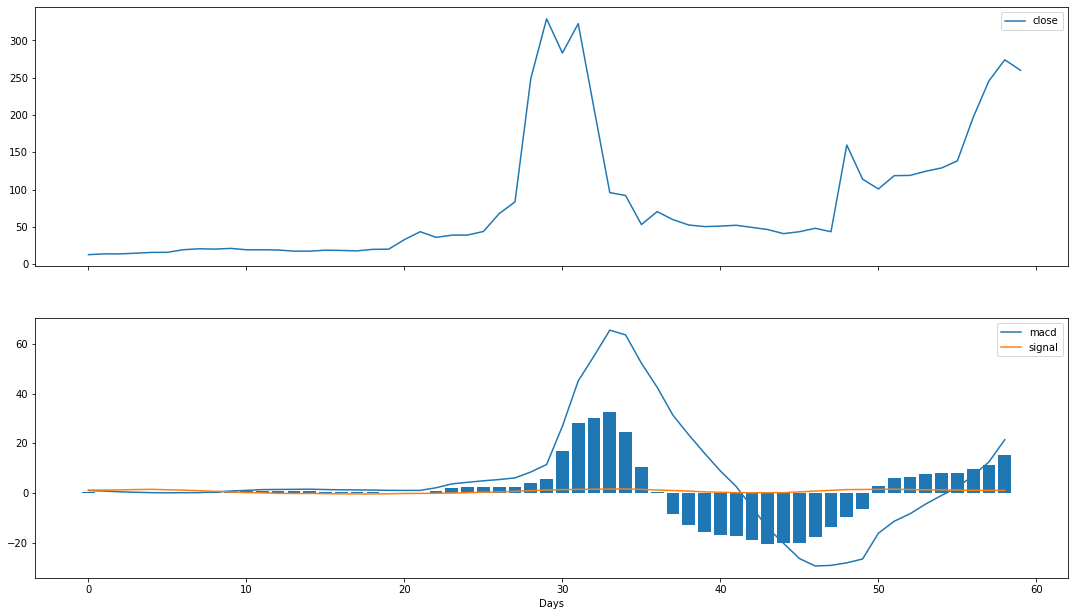

In [4]:
days = 60

chart_data = list(data['c'].tail(days))

macd_vals = macd_over_period(list(data['c']), days)

macd_line = list([i[0] for i in macd_vals])[-1-days:-1]
sig_line = list([i[1] for i in macd_vals])[-1-days:-1]
histo = list([i[2] for i in macd_vals])[-1-days:-1]

oscillator_dicts = [
    { 'chart': 'line', 'data': macd_line, 'label': 'macd' },
    { 'chart': 'line', 'data': sig_line, 'label': 'signal' },
    { 'chart': 'bar', 'data': histo, 'label': ''}
]

data_dicts = [
    { 'label': 'close', 'data': chart_data }
]

chart(ticker, data_dicts, oscillator_dicts)

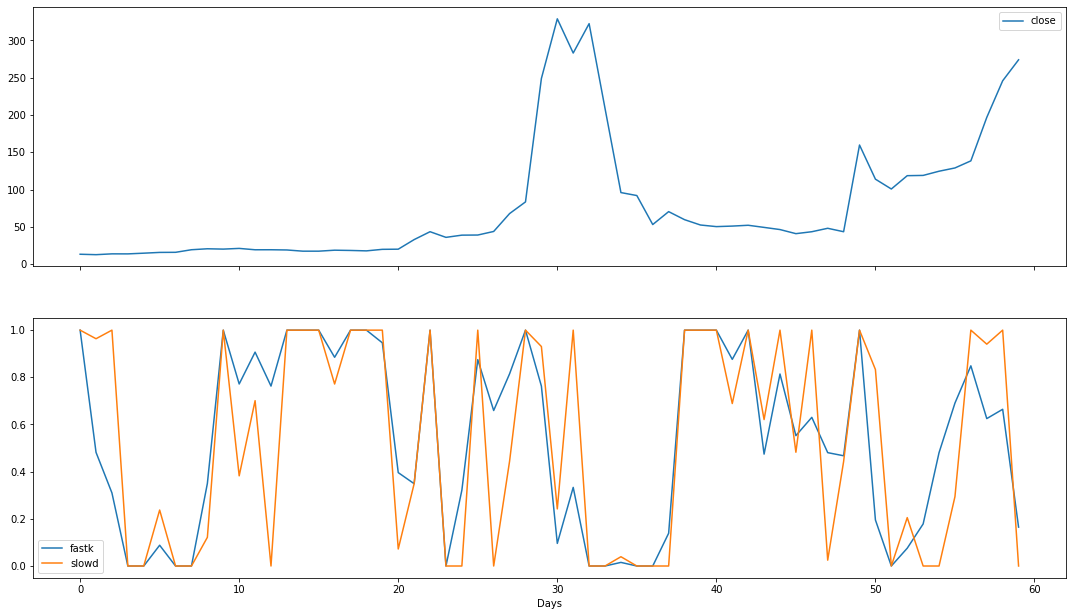

In [9]:
stochastic_vals = stochastic_over_period(list(data['c']), days)

fastk_data = list([i[0] for i in stochastic_vals])
slowd_data = list([i[2] for i in stochastic_vals])

oscillator_dicts = [
    { 'chart': 'line', 'data': fastk_data, 'label': 'fastk'},
    { 'chart': 'line', 'data': slowd_data, 'label': 'slowd'}
]

data_dicts = [
    { 'label': 'close', 'data': chart_data }
]

chart(ticker, data_dicts, oscillator_dicts)